This notebook requires [ALPS](http://alps.comp-phys.org), and is adapted from the example [script](http://alps.comp-phys.org/static/tutorials2.2.0/ed-02-gaps/tutorial2a.py) for exact diagonlization of spin chains.

In [164]:
%matplotlib inline
import pyalps
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc

import pyalps.plot
import pyalps.fit_wrapper as fw

Prepare the input parameters

In [126]:
parms = []
parms.append(
{ 
  'LATTICE'                   : "chain lattice", 
  'MODEL'                     : "spin",
  'local_S'                   : 0.5,
  'J'                         : 1,
  'L'                         : 26,
  'CONSERVED_QUANTUMNUMBERS'  : 'Sz',
  'Sz_total'                  : 0
}
)

Write the input file and run the simulation

In [127]:
input_file = pyalps.writeInputFiles('parm2a',parms)
res = pyalps.runApplication('sparsediag',input_file) #, MPI=4)

sparsediag parm2a.in.xml


Load data

In [128]:
data = pyalps.loadSpectra(pyalps.getResultFiles(prefix='parm2a'))

Extract ground state energies in each sector

In [135]:
energies = [meas.y for meas in data[0]]
momenta = [meas.props['TOTAL_MOMENTUM'] for meas in data[0]]

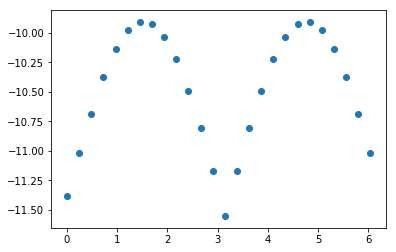

In [136]:
plt.scatter(momenta,energies)

The lowest energy is actually at momentum $\pi$!

In [159]:
excited_energies = energies - np.min(energies)

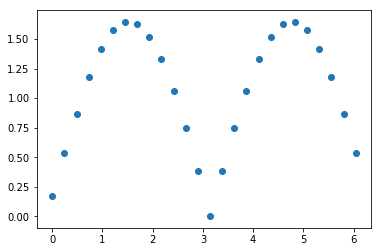

In [162]:
plt.scatter(momenta,excited_energies)

In [146]:
momentum_dCP = np.linspace(0,2*np.pi,500)

In [147]:
energy_dCP = np.pi / 2 * np.abs(np.sin(momentum))

Text(0,0.5,u'$\\omega(\\eta)-\\omega(\\pi)$')

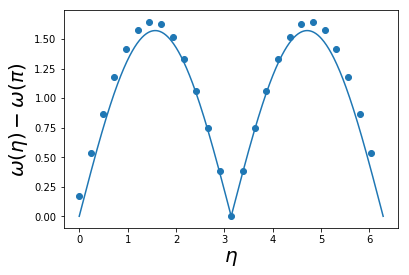

In [168]:
plt.scatter(momenta,excited_energies)
plt.plot(momentum_dCP, energy_dCP)
plt.xlabel(r'$\eta$', fontsize = 20)
plt.ylabel(r'$\omega(\eta)-\omega(\pi)$', fontsize=20)